<a href="https://colab.research.google.com/github/koyomin9zx/CS313.K21-Homework/blob/master/Youtube_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Preprocessing***

**download & extract dataset**

In [0]:
!wget -O data.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00380/YouTube-Spam-Collection-v1.zip
!unzip data.zip

**Import data into Pandas**

In [6]:
import pandas as pd
import glob
import codecs

path = '/content' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    data_frame = pd.read_csv(filename, index_col=None, header=0, encoding='utf-8')
    li.append(data_frame)

df = pd.concat(li, axis=0, ignore_index=True)
df.head(5)


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13uwn2heqndtr5g304ccv5j5kqqzxjadmc0k,Corey Wilson,2015-05-28T21:39:52.376000,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,z124jvczaz3dxhnbc04cffk43oiugj25yzo0k,Epic Gaming,2015-05-28T20:07:20.610000,wierd but funny﻿,0
2,z13tczjy5xj0vjmu5231unho1ofey5zdk,LaS Music,2015-05-28T19:23:35.355000,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,z13tzr0hdpnayhqqc04cd3zqqqjkf3ngckk0k,Cheryl Fox,2015-05-28T17:49:35.294000,Party Rock....lol...who wants to shuffle!!!﻿,0
4,z12pcvix4zedcjvyb04ccr1r0mr2g5xwyng0k,PATRICK_TW,2015-05-28T16:28:26.818000,Party rock﻿,0


**DATA VISUALIZATION**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



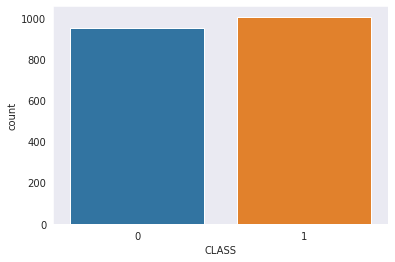

In [41]:
import seaborn as sns
sns.set_style("dark")
sns.countplot(df.CLASS)

**See how our content look like**

In [7]:
for i,content in enumerate (df['CONTENT'], 1):
    if i > 20:
        break
    else:
        print(i, content)



1 <a href="http://www.youtube.com/watch?v=KQ6zr6kCPj8&amp;t=2m19s">2:19</a> best part﻿
2 wierd but funny﻿
3 Hey guys, I&#39;m a human.<br /><br /><br />But I don&#39;t want to be a human, I want to be a sexy fucking giraffe.<br /><br /><br />I already have the money for the surgery to elongate my spinal core, the surgery to change my skin pigment, and everything else! Like this post so others can root me on in my dream!!!!<br /><br /><br />Im fucking with you, I make music, check out my first song! <a rel="nofollow" class="ot-hashtag" href="https://plus.google.com/s/%23giraffebruuh">#giraffebruuh</a>﻿
4 Party Rock....lol...who wants to shuffle!!!﻿
5 Party rock﻿
6 Shuffle﻿
7 Omg﻿
8 This song is just really fun ﻿
9 Awsome<br />﻿
10 wow!!!!!! increible song!!!!!!!!!﻿
11 I love this song so much﻿
12 2015 LIKEEE﻿
13 I miss when people dressed like this.﻿
14 2011- the last year of decent music.﻿
15 Best song ever!!!!﻿
16 super nice, love musique﻿
17 wowwwwwwwwwwwwwwwwwwwwwwwwwwwwww﻿
18 PARTY

**Text cleansing, remove digits, remove punctuation, remove html tags**

In [10]:
import string
from string import digits, punctuation

import re


hl_cleansed = []
cleanr = re.compile('<.*?>')
for hl in df['CONTENT']:
    hl=re.sub(cleanr, ' ', hl)
    #     Remove punctuations
    clean = hl.translate(str.maketrans('', '', punctuation))
    #clean = clean.translate(str.maketrans('', '', punctuation))
    #     Remove digits/numbers
    clean = clean.translate(str.maketrans('', '', digits))
    hl_cleansed.append(clean)
    
# View comparison
index=2
print('Original texts :')
print(df['CONTENT'][index])
print('\nAfter cleansed :')
print(hl_cleansed[index])

Original texts :
Hey guys, I&#39;m a human.<br /><br /><br />But I don&#39;t want to be a human, I want to be a sexy fucking giraffe.<br /><br /><br />I already have the money for the surgery to elongate my spinal core, the surgery to change my skin pigment, and everything else! Like this post so others can root me on in my dream!!!!<br /><br /><br />Im fucking with you, I make music, check out my first song! <a rel="nofollow" class="ot-hashtag" href="https://plus.google.com/s/%23giraffebruuh">#giraffebruuh</a>﻿

After cleansed :
Hey guys Im a human   But I dont want to be a human I want to be a sexy fucking giraffe   I already have the money for the surgery to elongate my spinal core the surgery to change my skin pigment and everything else Like this post so others can root me on in my dream   Im fucking with you I make music check out my first song  giraffebruuh ﻿


**Tokenization**

In [23]:
# Tokenization process
hl_tokens = []
for hl in hl_cleansed:
    hl_tokens.append(hl.split())

# View Comparison
index=2
print('Before tokenization :')
print(hl_cleansed[index])
print('\nAfter tokenization :')
print(hl_tokens[index])

Before tokenization :
Hey guys Im a human   But I dont want to be a human I want to be a sexy fucking giraffe   I already have the money for the surgery to elongate my spinal core the surgery to change my skin pigment and everything else Like this post so others can root me on in my dream   Im fucking with you I make music check out my first song  giraffebruuh ﻿

After tokenization :
['Hey', 'guys', 'Im', 'a', 'human', 'But', 'I', 'dont', 'want', 'to', 'be', 'a', 'human', 'I', 'want', 'to', 'be', 'a', 'sexy', 'fucking', 'giraffe', 'I', 'already', 'have', 'the', 'money', 'for', 'the', 'surgery', 'to', 'elongate', 'my', 'spinal', 'core', 'the', 'surgery', 'to', 'change', 'my', 'skin', 'pigment', 'and', 'everything', 'else', 'Like', 'this', 'post', 'so', 'others', 'can', 'root', 'me', 'on', 'in', 'my', 'dream', 'Im', 'fucking', 'with', 'you', 'I', 'make', 'music', 'check', 'out', 'my', 'first', 'song', 'giraffebruuh', '\ufeff']


**Lemmatization**

In [0]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

In [27]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# Init Lemmatizer
lemmatizer = WordNetLemmatizer()

hl_lemmatized = []
for tokens in hl_tokens:
    lemm = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in tokens]
    hl_lemmatized.append(lemm)
    
# Example comparison
word_1 = ['skyrim','dragons', 'are', 'having', 'parties']
word_2 = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in word_1]
print('Before lemmatization :\t',word_1)
print('After lemmatization :\t',word_2)

Before lemmatization :	 ['skyrim', 'dragons', 'are', 'having', 'parties']
After lemmatization :	 ['skyrim', 'dragon', 'be', 'have', 'party']


# ***Training LSTM Model***

In [28]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
import numpy as np

# Vectorize and convert text into sequences
max_features = 2000
max_token = len(max(hl_lemmatized))
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(hl_lemmatized)
sequences = tokenizer.texts_to_sequences(hl_lemmatized)
X = pad_sequences(sequences, maxlen=max_token)

Using TensorFlow backend.


Split Train, Test

In [0]:
from sklearn.model_selection import train_test_split

Y = df['CLASS'].values
Y = np.vstack(Y)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state = 42)

Building the Model

In [30]:
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

embed_dim = 64

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = max_token))
model.add(LSTM(96, dropout=0.2, recurrent_dropout=0.2, activation='relu'))
# model.add(Dense(128))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 14, 64)            128000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 96)                61824     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 97        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 189,921
Trainable params: 189,921
Non-trainable params: 0
_________________________________________________________________
None


Training process

In [31]:
epoch = 20
batch_size = 128
history=model.fit(X_train, Y_train, epochs = epoch, batch_size=batch_size, verbose = 2, validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1095 samples, validate on 274 samples
Epoch 1/20
 - 1s - loss: 0.6908 - accuracy: 0.6539 - val_loss: 0.6859 - val_accuracy: 0.7482
Epoch 2/20
 - 0s - loss: 0.6789 - accuracy: 0.7763 - val_loss: 0.6647 - val_accuracy: 0.7445
Epoch 3/20
 - 0s - loss: 0.6340 - accuracy: 0.7735 - val_loss: 0.5908 - val_accuracy: 0.7409
Epoch 4/20
 - 0s - loss: 0.5034 - accuracy: 0.7790 - val_loss: 0.4992 - val_accuracy: 0.7591
Epoch 5/20
 - 0s - loss: 0.3912 - accuracy: 0.8594 - val_loss: 0.3592 - val_accuracy: 0.8577
Epoch 6/20
 - 0s - loss: 0.2871 - accuracy: 0.9050 - val_loss: 0.3068 - val_accuracy: 0.8686
Epoch 7/20
 - 0s - loss: 0.2432 - accuracy: 0.9014 - val_loss: 0.2780 - val_accuracy: 0.8905
Epoch 8/20
 - 0s - loss: 0.1946 - accuracy: 0.9306 - val_loss: 0.2765 - val_accuracy: 0.8869
Epoch 9/20
 - 0s - loss: 0.1686 - accuracy: 0.9279 - val_loss: 0.2637 - val_accuracy: 0.8869
Epoch 10/20
 - 0s - loss: 0.1448 - accuracy: 0.9470 - val_loss: 0.2707 - val_accuracy: 0.8832
Epoch 11/20
 - 0s - lo

# ***Model Evaluation***



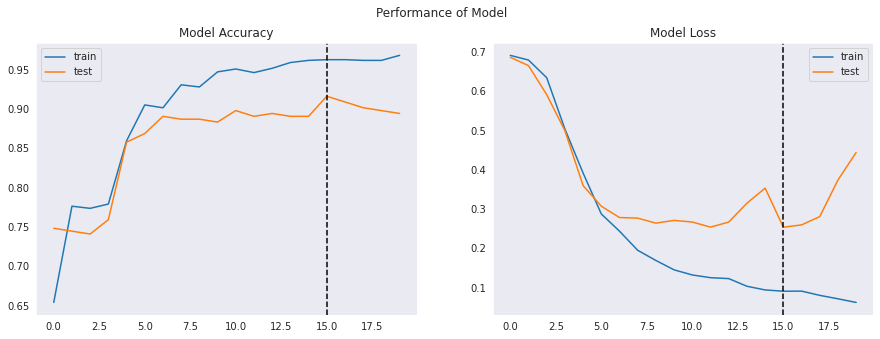

In [43]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fig.suptitle("Performance of Model")
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
vline_cut = np.where(history.history['val_accuracy'] == np.max(history.history['val_accuracy']))[0][0]
ax1.axvline(x=vline_cut, color='k', linestyle='--')
ax1.set_title("Model Accuracy")
ax1.legend(['train', 'test'])

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
vline_cut = np.where(history.history['val_loss'] == np.min(history.history['val_loss']))[0][0]
ax2.axvline(x=vline_cut, color='k', linestyle='--')
ax2.set_title("Model Loss")
ax2.legend(['train', 'test'])
plt.show()

# ***Test Model***

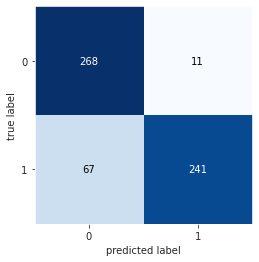

In [109]:
from mlxtend.plotting import plot_confusion_matrix

pred=np.around(model.predict(X_test))
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(Y_test,pred))
plt.show()

In [110]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       279
           1       0.96      0.78      0.86       308

    accuracy                           0.87       587
   macro avg       0.88      0.87      0.87       587
weighted avg       0.88      0.87      0.87       587



# ***Use Another ML Algorithms to Classify***

**Preparing the Data**

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
X = [" ".join(x) for x in hl_lemmatized]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X,df['CLASS'],test_size=0.3)

**Word Vectorization using TF-IDF**

In [0]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(X)
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [91]:
print(Tfidf_vect.vocabulary_)

{'best': 295, 'part': 2375, 'wierd': 3556, 'but': 413, 'funny': 1174, 'hey': 1375, 'guy': 1301, 'im': 1642, 'human': 1601, 'dont': 816, 'want': 3471, 'to': 3260, 'be': 260, 'sexy': 2837, 'fuck': 1163, 'giraffe': 1218, 'already': 103, 'have': 1344, 'the': 3206, 'money': 2146, 'for': 1117, 'surgery': 3126, 'elongate': 897, 'my': 2202, 'spinal': 3006, 'core': 625, 'change': 469, 'skin': 2914, 'pigment': 2434, 'and': 131, 'everything': 967, 'else': 898, 'like': 1900, 'this': 3230, 'post': 2497, 'so': 2945, 'others': 2346, 'can': 426, 'root': 2751, 'me': 2051, 'on': 2321, 'in': 1656, 'dream': 830, 'with': 3575, 'you': 3652, 'make': 2020, 'music': 2189, 'check': 488, 'out': 2352, 'first': 1090, 'song': 2964, 'giraffebruuh': 1219, 'party': 2376, 'rocklolwho': 2745, 'shuffle': 2879, 'rock': 2743, 'omg': 2318, 'just': 1781, 'really': 2645, 'fun': 1171, 'awsome': 226, 'wow': 3604, 'increible': 1667, 'love': 1971, 'much': 2181, 'likeee': 1905, 'miss': 2122, 'when': 3537, 'people': 2404, 'dress': 

**Trainning on the SVM classifier**

In [106]:
SVM = svm.SVC(C=1.0, kernel='linear', verbose=True)
SVM.fit(Train_X_Tfidf,Train_Y)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True)

**Predict and evaluate the SVM classifier**

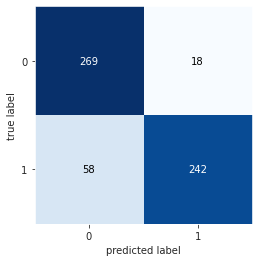

In [113]:
predictions_SVM=SVM.predict(Test_X_Tfidf)
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(Test_Y,predictions_SVM))
plt.show()

In [114]:
print(classification_report(Test_Y,predictions_SVM))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       287
           1       0.93      0.81      0.86       300

    accuracy                           0.87       587
   macro avg       0.88      0.87      0.87       587
weighted avg       0.88      0.87      0.87       587



**Trainning on the Naive Bayes Classifier**

In [115]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

**Predict and evaluate the Naive Bayes Classifier**

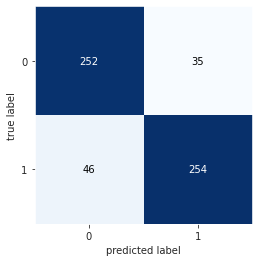

In [116]:
predictions_NB=Naive.predict(Test_X_Tfidf)
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(Test_Y,predictions_NB))
plt.show()

In [117]:
print(classification_report(Test_Y,predictions_NB))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       287
           1       0.88      0.85      0.86       300

    accuracy                           0.86       587
   macro avg       0.86      0.86      0.86       587
weighted avg       0.86      0.86      0.86       587

